In [1]:
from astropy.io import fits
import numpy as np
import glob

In [2]:
files = glob.glob('*opt00.bs.fits')  # Pre/over-scan region removed images (using hpkossub.py).

In [3]:
files

['HN0310534opt00.bs.fits',
 'HN0310535opt00.bs.fits',
 'HN0310536opt00.bs.fits',
 'HN0310537opt00.bs.fits',
 'HN0310538opt00.bs.fits',
 'HN0310539opt00.bs.fits',
 'HN0310540opt00.bs.fits',
 'HN0310541opt00.bs.fits',
 'HN0310542opt00.bs.fits',
 'HN0310543opt00.bs.fits',
 'HN0310544opt00.bs.fits',
 'HN0310545opt00.bs.fits',
 'HN0310546opt00.bs.fits',
 'HN0310547opt00.bs.fits',
 'HN0310548opt00.bs.fits',
 'HN0310549opt00.bs.fits',
 'HN0310550opt00.bs.fits',
 'HN0310551opt00.bs.fits',
 'HN0310552opt00.bs.fits',
 'HN0310553opt00.bs.fits',
 'HN0310554opt00.bs.fits',
 'HN0310555opt00.bs.fits',
 'HN0310556opt00.bs.fits',
 'HN0310557opt00.bs.fits',
 'HN0310558opt00.bs.fits',
 'HN0310559opt00.bs.fits',
 'HN0310560opt00.bs.fits',
 'HN0310561opt00.bs.fits',
 'HN0310562opt00.bs.fits',
 'HN0310563opt00.bs.fits',
 'HN0310564opt00.bs.fits',
 'HN0310565opt00.bs.fits',
 'HN0310566opt00.bs.fits',
 'HN0310567opt00.bs.fits',
 'HN0310568opt00.bs.fits',
 'HN0310569opt00.bs.fits',
 'HN0310570opt00.bs.fits',
 

In [4]:
fns_testimgs = []
for fn in files:
    hdul = fits.open(fn)
    if hdul[0].header['OBJECT'] == 'FlatLampSPGainTest':
        fns_testimgs.append(fn)

In [5]:
fns_testimgs

['HN0310544opt00.bs.fits',
 'HN0310545opt00.bs.fits',
 'HN0310546opt00.bs.fits',
 'HN0310547opt00.bs.fits',
 'HN0310548opt00.bs.fits',
 'HN0310549opt00.bs.fits',
 'HN0310550opt00.bs.fits',
 'HN0310551opt00.bs.fits',
 'HN0310552opt00.bs.fits',
 'HN0310553opt00.bs.fits',
 'HN0310554opt00.bs.fits',
 'HN0310555opt00.bs.fits',
 'HN0310556opt00.bs.fits',
 'HN0310557opt00.bs.fits',
 'HN0310558opt00.bs.fits',
 'HN0310559opt00.bs.fits',
 'HN0310560opt00.bs.fits',
 'HN0310561opt00.bs.fits',
 'HN0310562opt00.bs.fits',
 'HN0310563opt00.bs.fits']

In [6]:
def find_files_w_header(find_dict, fns):
    """ File name filtering using fits headers.
    """
    fns_result = []
    for fn in fns:
        hdul = fits.open(fn)
        found = True
        for key in find_dict:
            if hdul[0].header[key] != find_dict[key]:
                found = False
                break
        if found == True:
            fns_result.append(fn)
    return fns_result

In [7]:
# Filter for test images for gain measurment.
find_dict={'OBJECT':  'FlatLampSPGainTest'}

In [8]:
fns_testimgs_bs = find_files_w_header(find_dict, fns_testimgs)

In [9]:
fns_testimgs_bs

['HN0310544opt00.bs.fits',
 'HN0310545opt00.bs.fits',
 'HN0310546opt00.bs.fits',
 'HN0310547opt00.bs.fits',
 'HN0310548opt00.bs.fits',
 'HN0310549opt00.bs.fits',
 'HN0310550opt00.bs.fits',
 'HN0310551opt00.bs.fits',
 'HN0310552opt00.bs.fits',
 'HN0310553opt00.bs.fits',
 'HN0310554opt00.bs.fits',
 'HN0310555opt00.bs.fits',
 'HN0310556opt00.bs.fits',
 'HN0310557opt00.bs.fits',
 'HN0310558opt00.bs.fits',
 'HN0310559opt00.bs.fits',
 'HN0310560opt00.bs.fits',
 'HN0310561opt00.bs.fits',
 'HN0310562opt00.bs.fits',
 'HN0310563opt00.bs.fits']

In [10]:
# Filter for bias images.
find_bias={'OBJECT': 'BIAS'}

In [11]:
fns_bias = find_files_w_header(find_bias, files)[:20]  # Use first 20 images.

In [12]:
bias_imgs = []
for fn in fns_bias:
    hdul = fits.open(fn)
    bias_imgs.append(hdul[0].data)
bias_imgs_ndarray = np.stack(bias_imgs)

In [13]:
bias_img_median = np.median(bias_imgs_ndarray, axis=0)
del(bias_imgs)

In [14]:
import matplotlib.pyplot as plt

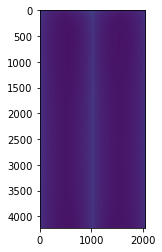

In [15]:
plt.imshow(bias_img_median)

In [16]:
imgs_testimgs_bs = []
for fn in fns_testimgs:
    hdul = fits.open(fn)
    imgs_testimgs_bs.append(hdul[0].data - bias_img_median)

In [17]:
imgs_testimgs_bs_ndarray = np.stack(imgs_testimgs_bs)
del(imgs_testimgs_bs)

In [18]:
testimg_bs_median = np.median(imgs_testimgs_bs_ndarray, axis=0)

In [19]:
testimg_bs_std = np.std(imgs_testimgs_bs_ndarray, axis=0)

In [20]:
img_ave = np.average(testimg_bs_median)
img_std = np.average(testimg_bs_std)

In [21]:
testimg_bs_median.shape

(4222, 2048)

In [22]:
np.max(testimg_bs_median)

29632.93

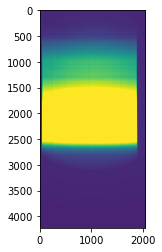

In [23]:
plt.imshow(testimg_bs_median, vmin=-1000, vmax = img_ave*2)

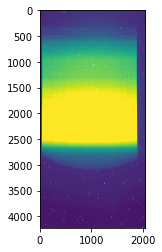

In [24]:
plt.imshow(testimg_bs_std, vmin=0, vmax=img_std*2)

In [25]:
testimg_bs_dev = testimg_bs_std **2

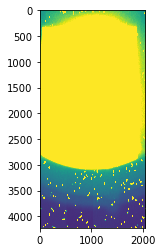

In [26]:
plt.imshow(testimg_bs_dev, vmin=0, vmax=100)

In [27]:
img_ysize = testimg_bs_median.shape[0]

In [28]:
img_xsize = testimg_bs_median.shape[1]

In [29]:
img_xsize_per_ch = int(img_xsize /2)

In [30]:
print(img_xsize, img_ysize, img_xsize_per_ch)

2048 4222 1024


In [31]:
sample_xwidth_per_ch = 256

In [32]:
def get_sample_regions(imgdata, n_port, img_xsize_per_ch, sample_xsize_per_ch):
    """
    n_port: 1-4
    """
    n_ch = n_port -1
    xmin = img_xsize_per_ch * n_ch +int(img_xsize_per_ch/2) - int(sample_xsize_per_ch/2)
    xmax =  img_xsize_per_ch * n_ch +int(img_xsize_per_ch/2) + int(sample_xsize_per_ch/2)
    return imgdata[:, xmin:xmax+1]

In [33]:
n_port = 1

In [34]:
array_sig = get_sample_regions(testimg_bs_median, n_port, img_xsize_per_ch, sample_xwidth_per_ch).ravel()
array_dev = get_sample_regions(testimg_bs_dev, n_port, img_xsize_per_ch, sample_xwidth_per_ch).ravel()

In [35]:
array_sig.shape

(1085054,)

In [36]:
array_dev.shape

(1085054,)

In [37]:
plt.ylim([0, 100000])
plt.scatter(array_sig, array_dev, s=1)

In [38]:
x_bin_width = 100

In [39]:
np.max(array_sig)

20139.36

In [40]:
x_max_calc = np.floor(np.max(array_sig)/x_bin_width-1)*x_bin_width

In [41]:
x_max_calc

20000.0

In [42]:
sig_all = []
dev_all = []
err_all = []
x = 0
while (x<= x_max_calc):
    #print(x)
    data_index = ((array_sig > x) & (array_sig <= x+x_bin_width))
    x += x_bin_width
    #print(data_index)
    #and array_sig <= (x+x_bin_width))
    sig_data_prt = array_sig[data_index]
    dev_data_prt = array_dev[data_index]
    
    trues = data_index[data_index==True]
    n_sample = len(trues)
    if n_sample == 0:
        continue
    sig = np.median(sig_data_prt)
    dev = np.median(dev_data_prt)
    error = np.std(dev_data_prt)/np.sqrt(n_sample-1)
    print(sig, dev, error, n_sample)
    sig_all.append(sig)
    dev_all.append(dev)
    err_all.append(error)

30.067217 20.198702 2.4968477832469516 211443
134.39607 54.73513 7.9746773367756445 120504
238.5268 92.530106 0.1562396861848494 43907
341.36383 126.39049 0.35729028356524545 15299
458.0199 165.61176 5.507144775277816 22764
541.48303 196.64369 8.694830869945902 23901
639.6687 230.24081 0.7238230026669807 11488
755.5679 269.04578 0.9652149357815147 8911
848.3255 302.34573 5.6792394216107915 12196
944.6113 337.52716 7.665681907771609 10311
1047.163 369.11572 1.4874925893440554 6990
1148.052 408.1544 1.8210475006991034 5735
1250.4548 439.88287 2.054742981853164 5155
1349.155 473.91458 2.239100974512989 5181
1448.478 510.07874 2.496375430555554 4659
1546.8125 545.85693 2.9833295375108415 3905
1648.8076 571.9332 3.2881188157946033 3292
1749.8218 621.185 3.6655347261354314 3220
1850.341 651.7184 3.8007280211018757 3335
1950.9629 677.8036 3.925750779753287 3594
2054.269 717.0035 3.7405422362880314 4269
2152.1665 747.89636 3.439603034320125 5454
2250.9575 783.2606 3.447697215355226 5784
2346.8

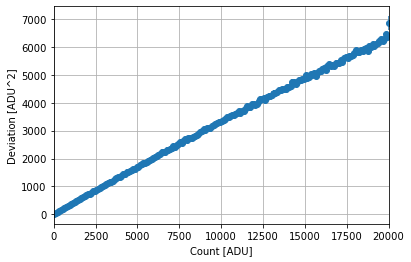

In [43]:
plt.errorbar(sig_all, dev_all, yerr=err_all,  fmt="o")
plt.grid()
plt.xlabel('Count [ADU]')
plt.ylabel('Deviation [ADU^2]')
plt.xlim([0, x_max_calc])
plt.show()

In [44]:
from scipy import optimize

In [45]:
def photontransfer_curve(x, gain, ro):
    return x/gain + (ro/gain)**2

In [46]:
par, cov = optimize.curve_fit(photontransfer_curve, sig_all, dev_all,  sigma=err_all, p0=(0.1, 4.0))

In [47]:
par

array([ 3.01436756, 11.47528902])

In [48]:
cov

array([[3.58269835e-05, 7.72748679e-04],
       [7.72748679e-04, 6.24516473e-02]])

In [49]:
x_fit = np.linspace(0, 2500, 26)

In [50]:
y_fit = photontransfer_curve(x_fit, par[0], par[1])

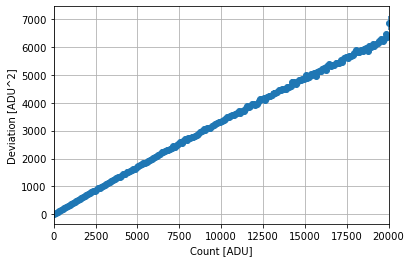

In [51]:
plt.errorbar(sig_all, dev_all, yerr=err_all,  fmt="o")
plt.plot(x_fit, y_fit)
plt.grid()
plt.xlabel('Count [ADU]')
plt.ylabel('Deviation [ADU^2]')
plt.xlim([0, x_max_calc])
plt.show()

In [52]:
def analyse_photontransfer_curve(sig_all, dev_all, err_all, p0=(3, 10.0)):
    par, cov = optimize.curve_fit(photontransfer_curve, sig_all, dev_all,  sigma=err_all, p0=p0, absolute_sigma=False)
    return par, cov

In [53]:
def plt_photontransfer_curve(sig_all, dev_all, err_all, par):
    x_fit = np.linspace(0, np.max(sig_all)*0.8, 100)
    y_fit = photontransfer_curve(x_fit, par[0], par[1])
    plt.grid()
    plt.xlabel('Count [ADU]')
    plt.ylabel('Deviation [ADU^2]')
    plt.xlim([0, x_max_calc])
    plt.ylim([0,10000])
    plt.errorbar(sig_all, dev_all, yerr=err_all,  fmt=".")
    plt.plot(x_fit, y_fit, color='r', linewidth=3)
    plt.show()

In [54]:
par, cov = analyse_photontransfer_curve(sig_all, dev_all, err_all)
plt_photontransfer_curve(sig_all, dev_all, err_all, par)

In [55]:
def get_sample_region(img_sig, img_dev, n_port, sample_xsize_per_ch=256):
    img = img_sig
    img_ysize = img.shape[0]
    img_xsize = img.shape[1]
    img_xsize_per_ch = int(img_xsize /4)
    n_ch = n_port -1
    xmin = int(img_xsize_per_ch * n_ch + img_xsize_per_ch/2 - sample_xsize_per_ch/2)
    xmax =  int(img_xsize_per_ch * n_ch + img_xsize_per_ch/2 + sample_xsize_per_ch/2)
    print('img_sig.shape {}'.format(img_sig.shape))
    print(xmin, xmax)
    array_sig = img_sig[:, xmin:xmax+1].ravel()
    array_dev= img_dev[:, xmin:xmax+1].ravel()
    return array_sig, array_dev

In [56]:
def calc_statistics_in_sample_region(array_sig, array_dev, count_bin_width=100):
    sig_all = []
    dev_all = []
    err_all = []
    count = 0
    count_max_calc = np.floor(np.max(array_sig)/count_bin_width-1)*count_bin_width
    while (count<= count_max_calc):
        #print(x)
        data_index = ((array_sig > count) & (array_sig <= count+count_bin_width))
        count += count_bin_width
        #print(data_index)
        #and array_sig <= (x+x_bin_width))
        sig_data_prt = array_sig[data_index]
        dev_data_prt = array_dev[data_index]
    
        trues = data_index[data_index==True]
        n_sample = len(trues)
        #print(n_sample)
        if n_sample == 0:
            continue
        sig = np.median(sig_data_prt)
        dev = np.median(dev_data_prt)
        error = np.std(dev_data_prt)/np.sqrt(n_sample-1)
       # print(sig, dev, error, n_sample)
        sig_all.append(sig)
        dev_all.append(dev)
        err_all.append(error)
    return sig_all, dev_all, err_all

## Calculate gains of the port 1-4

Port 1
img_sig.shape (4222, 2048)
128 384


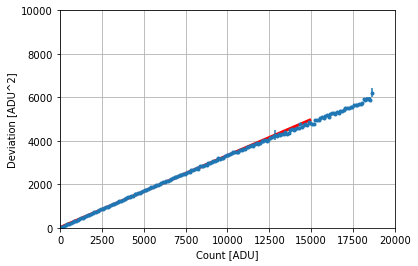

Port 2
img_sig.shape (4222, 2048)
640 896


Port 3
img_sig.shape (4222, 2048)
1152 1408


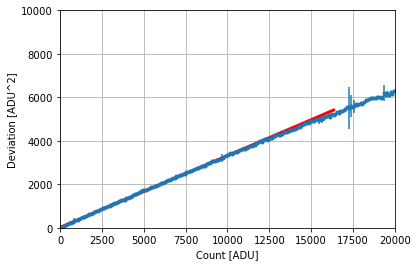

Port 4
img_sig.shape (4222, 2048)
1664 1920


In [57]:
pars = []
covs = []
for n_port in range(1, 5):
    del(array_dev)
    del(array_sig)
    print('Port {}'.format(n_port))
    array_sig, array_dev = get_sample_region(testimg_bs_median, testimg_bs_dev, n_port)
    sig_all, dev_all, err_all = calc_statistics_in_sample_region(array_sig, array_dev)
    par, cov = analyse_photontransfer_curve(sig_all, dev_all, err_all)
    plt_photontransfer_curve(sig_all, dev_all, err_all, par)
    pars.append(par)
    covs.append(cov)

In [58]:
pars

[array([ 3.0215559 , 12.19571412]),
 array([ 3.01249398, 12.16377365]),
 array([ 3.02780718, 12.94680988]),
 array([ 3.08622487, 17.05652316])]

In [59]:
covs

[array([[3.45837847e-05, 1.15815041e-03],
        [1.15815041e-03, 1.19703527e-01]]),
 array([[4.24433829e-05, 1.33642333e-03],
        [1.33642333e-03, 1.30086916e-01]]),
 array([[3.71237916e-05, 1.00530554e-03],
        [1.00530554e-03, 1.07409051e-01]]),
 array([[4.87137954e-05, 2.76045697e-03],
        [2.76045697e-03, 3.38809607e-01]])]

In [60]:
i=1
print('#ch gain [e/ADU] err_gain ro[e-] err_ro')
for par, cov in zip(pars, covs):
    print('{:1d} {:12.5f} {:12.5f} {:8.2f} {:8.2f}'.format(i, float(par[0]),  float(cov[0][1]), float(par[1]), float(cov[1][1])))
    i += 1

#ch gain [e/ADU] err_gain ro[e-] err_ro
1      3.02156      0.00116    12.20     0.12
2      3.01249      0.00134    12.16     0.13
3      3.02781      0.00101    12.95     0.11
4      3.08622      0.00276    17.06     0.34
